# Клиенты авиакомпании

Датасет содержит информацию о клиентах некоторой авиакомпании

## Импорт библиотек, константы

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 42

In [3]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/clients.csv"

## Загрузка и обзор данных

### Загрузка

In [4]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

**Целевая переменная**
- satisfaction (удовлетворенность клиента полетом), бинарная (satisfied или neutral or dissatisfied)

**Признаки**
- Gender (categorical: Male или Female): пол клиента
- Age (numeric, int): количество полных лет
- Customer Type (categorical: Loyal Customer или disloyal Customer): лоялен ли клиент авиакомпании?
- Type of Travel (categorical: Business travel или Personal Travel): тип поездки
- Class (categorical: Business или Eco, или Eco Plus): класс обслуживания в самолете
- Flight Distance (numeric, int): дальность перелета (в милях)
- Departure Delay in Minutes (numeric, int): задержка отправления (неотрицательная)
- Arrival Delay in Minutes (numeric, int): задержка прибытия (неотрицательная)

Признаки, перечисленные ниже, являются числовыми. По смыслу они категориальные: клиент ставил оценку от 1-го до 5-ти включительно. Есть выбросы!

- Inflight wifi service (categorical, int): оценка клиентом интернета на борту
- Departure/Arrival time convenient (categorical, int): оценка клиентом удобство времени прилета и вылета
- Ease of Online booking (categorical, int): оценка клиентом удобства онлайн-бронирования
- Gate location (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- Food and drink (categorical, int): оценка клиентом еды и напитков на борту
- Online boarding (categorical, int): оценка клиентом выбора места в самолете
- Seat comfort (categorical, int): оценка клиентом удобства сиденья
- Inflight entertainment (categorical, int): оценка клиентом развлечений на борту
- On-board service (categorical, int): оценка клиентом обслуживания на борту
- Leg room service (categorical, int): оценка клиентом места в ногах на борту
- Baggage handling (categorical, int): оценка клиентом обращения с багажом
- Checkin service (categorical, int): оценка клиентом регистрации на рейс
- Inflight service (categorical, int): оценка клиентом обслуживания на борту
- Cleanliness (categorical, int): оценка клиентом чистоты на борту

In [5]:
df.shape

(129880, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

In [7]:
# случайные пять записей из датасета
df.sample(5)

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
86228,86229,Female,23.0,disloyal Customer,Business travel,Eco,356.0,0.0,0.0,4.0,...,4.0,2.0,4.0,4.0,2.0,5.0,4.0,3.0,4.0,satisfied
61381,61382,Male,53.0,Loyal Customer,Business travel,Business,679.0,0.0,0.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,2.0,neutral or dissatisfied
124014,124015,Male,36.0,Loyal Customer,Business travel,Business,184.0,0.0,0.0,0.0,...,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,satisfied
48965,48966,Female,55.0,disloyal Customer,Business travel,Eco,109.0,0.0,0.0,3.0,...,2.0,3.0,4.0,5.0,1.0,3.0,5.0,4.0,4.0,neutral or dissatisfied
84235,84236,Male,7.0,Loyal Customer,Personal Travel,Eco,432.0,0.0,0.0,4.0,...,4.0,2.0,2.0,5.0,3.0,4.0,5.0,5.0,2.0,-


In [8]:
df = df.drop_duplicates()  # дупликатов в таблице нет
df.shape

(129880, 24)

In [9]:
pd.set_option('display.max_columns', None)
df.describe(include='all')

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,129880.000000,129549,129564.000000,129803,129779,129764,129786.000000,129773.000000,129371.000000,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000,129880
unique,NaN,2,NaN,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Female,NaN,Loyal Customer,Business travel,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,65726,NaN,106040,89625,62103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,64940.500000,NaN,40.113951,NaN,NaN,NaN,1323.385804,15.811301,16.651406,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865,NaN
std,37493.270818,NaN,20.365190,NaN,NaN,NaN,4516.191530,93.206139,109.167328,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625,NaN
min,1.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,NaN
25%,32470.750000,NaN,27.000000,NaN,NaN,NaN,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000,NaN
50%,64940.500000,NaN,40.000000,NaN,NaN,NaN,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000,NaN
75%,97410.250000,NaN,51.000000,NaN,NaN,NaN,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000,NaN


In [10]:
df.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129564.000000,129786.000000,129773.000000,129371.000000,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,64940.500000,40.113951,1323.385804,15.811301,16.651406,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,37493.270818,20.365190,4516.191530,93.206139,109.167328,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,64940.500000,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,129880.000000,621.000000,379620.000000,22227.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000


Анализ распределения целевой переменной: Посмотрим на распределение значений в целевой переменной "satisfaction" и посчитаем количество удовлетворенных и недовольных клиентов.

In [11]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
-                          25976
Name: count, dtype: int64

Видим, что, порядка, 20 процентов данных об удовлетворенности клиентов представлены не в нужном формате "-". 

Удалим значения '-' и посмотрим на баланс классов.

In [12]:
df = df[df['satisfaction'] != '-']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103644 non-null  object 
 2   Age                                103643 non-null  float64
 3   Customer Type                      103838 non-null  object 
 4   Type of Travel                     103816 non-null  object 
 5   Class                              103815 non-null  object 
 6   Flight Distance                    103832 non-null  float64
 7   Departure Delay in Minutes         103820 non-null  float64
 8   Arrival Delay in Minutes           103497 non-null  float64
 9   Inflight wifi service              103871 non-null  float64
 10  Departure/Arrival time convenient  103863 non-null  float64
 11  Ease of Online booking             103871 no

<BarContainer object of 2 artists>

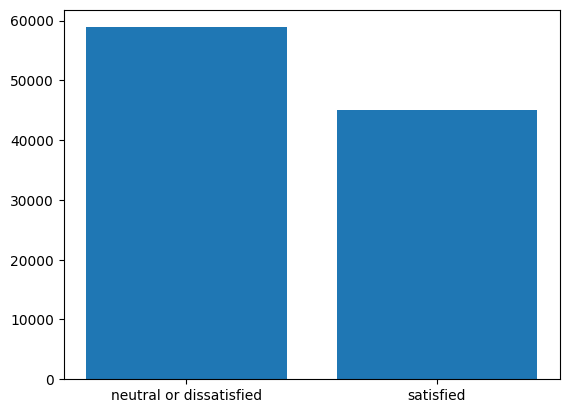

In [13]:
plt.bar(['neutral or dissatisfied', 'satisfied'], df['satisfaction'].value_counts())

<h4>Находим процент пустых ячеек в каждом из столбцов</h4>

In [14]:
df.isnull().mean() * 100

id                                   0.000000
Gender                               0.250231
Age                                  0.251193
Customer Type                        0.063520
Type of Travel                       0.084694
Class                                0.085656
Flight Distance                      0.069295
Departure Delay in Minutes           0.080844
Arrival Delay in Minutes             0.391708
Inflight wifi service                0.031760
Departure/Arrival time convenient    0.039460
Ease of Online booking               0.031760
Gate location                        0.029835
Food and drink                       0.033685
Online boarding                      0.035610
Seat comfort                         0.039460
Inflight entertainment               0.042347
On-board service                     0.030798
Leg room service                     0.034647
Baggage handling                     0.030798
Checkin service                      0.032723
Inflight service                  

В процентном соотношении количество пропусков невелико (менее 5%).

<h4>Обрабатываем пропуски с данными о поле клиентов</h4>

Восполним пропуски значениями Female и Male так, чтобы в процентом соотношении количество женщин и мужчин было то же.

In [15]:
import random

# Рассчитываем доли мужчин и женщин
gender_counts = df['Gender'].value_counts()
# print(gender_counts)
gender_ratios = gender_counts / gender_counts.sum()
print(gender_ratios)

# Создаем список значений "Male" и "Female" с учетом их долей
gender_list = ['Male'] * int(gender_counts.sum() * gender_ratios['Male']) + ['Female'] * int(gender_counts.sum() * gender_ratios['Female'])

# Заполняем пропущенные значения выбранными случайными значениями
df['Gender'].fillna(random.choice(gender_list), inplace=True)


Gender
Female    0.50741
Male      0.49259
Name: count, dtype: float64


In [16]:
df['Gender'].value_counts()

Gender
Female    52590
Male      51314
Name: count, dtype: int64

In [ ]:
# Label Encoding. "Female": 0, "Male": 1
# gender_mapping = {"Female": 0, "Male": 1}
# df['Gender'] = df['Gender'].map(gender_mapping)

<h4>Рассмотрим данные клиентов о возрасте</h4>

<Axes: xlabel='Age'>

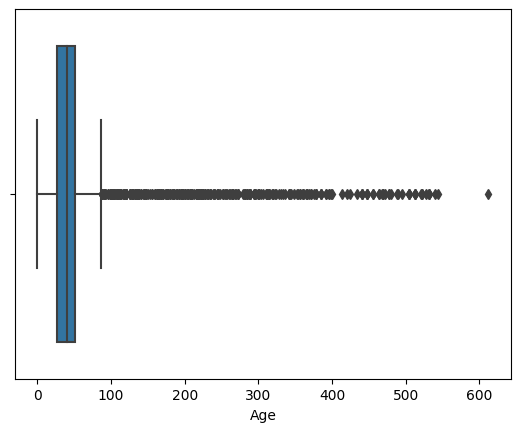

In [17]:
import seaborn as sns
sns.boxplot(x = df['Age'])

Видим достаточно большое число выбросов. Предполагаем, что возраст больше 110 является выбросом. Также видим, что есть данные с возрастом участников меньше 10 лет - предположим, что в том случае, если за ребенка в возрасте до 6 лет анкету заполнял родитель, заменим эти данные на медиану. 

In [18]:
outliers_age = df[(df['Age'] > 110) | (df['Age'] <= 6)]
outliers_age.shape  # количество так называемых выбросов

(351, 24)

In [19]:
median_age = df['Age'].median()
median_age  # медиана возраста

40.0

In [20]:
# Заменяем выбросы и пустые значения на медианное значение
df.loc[(df['Age'] > 110) | (df['Age'] <= 6), 'Age'] = median_age  
df.loc[df['Age'].isnull(), 'Age'] = median_age

Построили ящик с усами для новых данных о возрасте. Стало лучше. 

<Axes: xlabel='Age'>

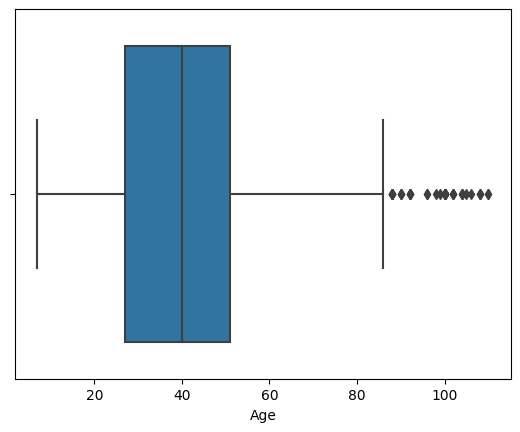

In [21]:
sns.boxplot(x = df['Age'])  

<Axes: xlabel='Age', ylabel='Count'>

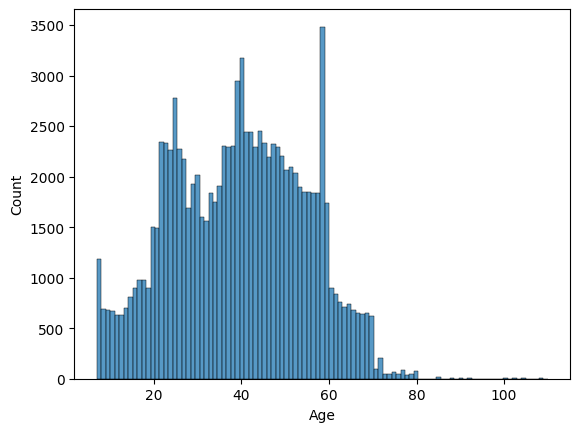

In [22]:
sns.histplot(data=df, x='Age')  # строим гистограмму

In [23]:
mean_value = df['Age'].mean()
mean_value  # находим среднее

39.41995495842316

Визуально распределение возраста после предобработки нормальное, значения среднего и медианы примерно равны

<h4>Обрабатываем данные с информацией о категории клиентов (лояльные или нет)</h4>

In [24]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       84873
disloyal Customer    18965
Name: count, dtype: int64

In [25]:
df['Customer Type'].isnull().sum()

66

Количество пропусков совсем невелико, поэтому заполним их модой.

In [26]:
df['Customer Type'].fillna('Loyal Customer', inplace=True)

In [27]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       84939
disloyal Customer    18965
Name: count, dtype: int64

In [ ]:
# Customer Type Label Encoding. "disloyal Customer": 0, "Loyal Customer": 1.
# custom_type_mapping = {"disloyal Customer": 0, "Loyal Customer": 1}
# df['Customer Type'] = df['Customer Type'].map(custom_type_mapping)

<h4>Обработаем признак Type of Travel</h4>

In [29]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    71596
Personal Travel    32220
Name: count, dtype: int64

In [30]:
df['Type of Travel'].fillna('Business travel', inplace=True)

Для изучения связи между типом поездки и удовлетворенностью клиента (целевой переменной "satisfaction") построим сводную таблицу или график, отображающий соотношение удовлетворенных и недовольных клиентов для каждого типа поездки.

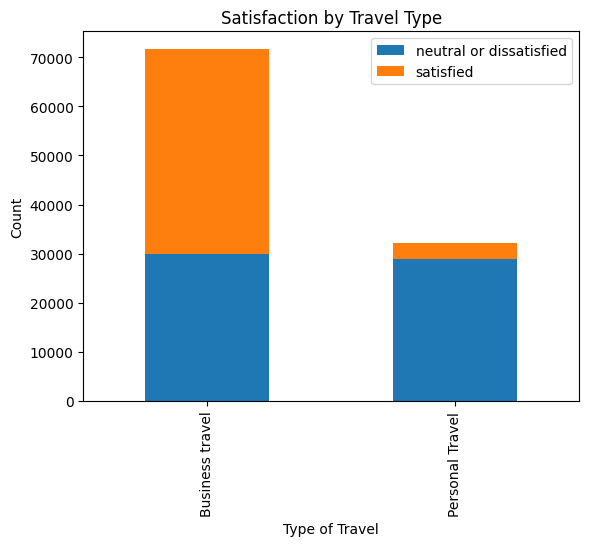

In [31]:
import matplotlib.pyplot as plt

# Группируем данные по типу поездки и удовлетворенности клиента, и подсчитываем их количество
satisfaction_by_travel_type = df.groupby(['Type of Travel', 'satisfaction']).size().unstack()

# Строим столбчатую диаграмму
satisfaction_by_travel_type.plot(kind='bar', stacked=True)
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.title('Satisfaction by Travel Type')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# travel_type_mapping = {"Business travel": 0, "Personal Travel": 1}
# df['Type of Travel'] = df['Type of Travel'].map(travel_type_mapping)

<h4>Обработаем признак Class</h4>

In [32]:
df['Class'].value_counts()

Class
Business    49615
Eco         46714
Eco Plus     7486
Name: count, dtype: int64

In [33]:
df['Class'].isnull().sum()

89

Так как количество пропусков совсем невелико, удалим эти строки. А также применим encoding для категориальных признаков.

In [34]:
df.dropna(subset=['Class'], inplace=True)

In [ ]:
class_mapping = {'Eco Plus': 1, 'Eco': 2, 'Business': 3}
df['Class'] = df['Class'].map(class_mapping)

In [35]:
df['Flight Distance'].describe()

count    103743.000000
mean       1326.616572
std        4654.644023
min           0.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max      379620.000000
Name: Flight Distance, dtype: float64

(array([1.03635e+05, 4.20000e+01, 1.80000e+01, 2.00000e+01, 1.00000e+01,
        8.00000e+00, 4.00000e+00, 3.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([     0.,  37962.,  75924., 113886., 151848., 189810., 227772.,
        265734., 303696., 341658., 379620.]),
 <BarContainer object of 10 artists>)

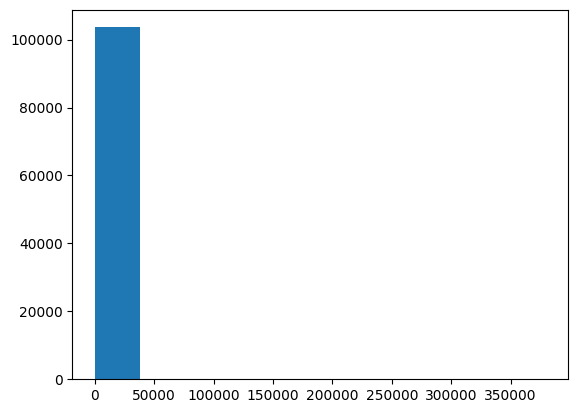

In [36]:
plt.hist(df['Flight Distance'])

<Axes: ylabel='Flight Distance'>

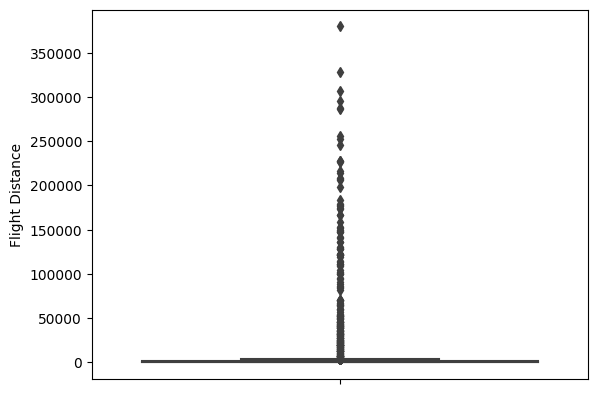

In [37]:
sns.boxplot(data=df, y='Flight Distance')

На представленных графиках видим, что есть достаточо большое количество выбросов. На основе межквартильного размаха вычислим выбросы и заменим их на среднее значение дальности полетов. 

In [38]:
# Вычисление первого и третьего квартилей
Q1 = df['Flight Distance'].quantile(0.25)
Q3 = df['Flight Distance'].quantile(0.75)

# Расчет межквартильного размаха
IQR = Q3 - Q1

# Определение границ выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выделение значений, находящихся за пределами границ выбросов
outliers = df[(df['Flight Distance'] < lower_bound) | (df['Flight Distance'] > upper_bound)]

# Замена выбросов на среднее значение дальности полета
mean_distance = df['Flight Distance'].mean()
df.loc[(df['Flight Distance'] < lower_bound) | (df['Flight Distance'] > upper_bound), 'Flight Distance'] = mean_distance

In [39]:
df['Flight Distance'].fillna(mean_distance, inplace=True)

In [40]:
df['Flight Distance'].isnull().sum()

0

<Axes: ylabel='Flight Distance'>

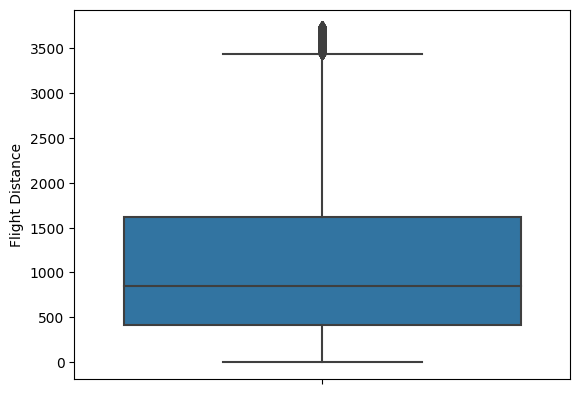

In [41]:
sns.boxplot(data=df, y='Flight Distance')

<h4>Departure Delay in Minutes</h4>

Проделаем то же самое, что и с дальностью полета. Будем считать очень большие значения выбросами и заменять их на среднее.

<Axes: ylabel='Departure Delay in Minutes'>

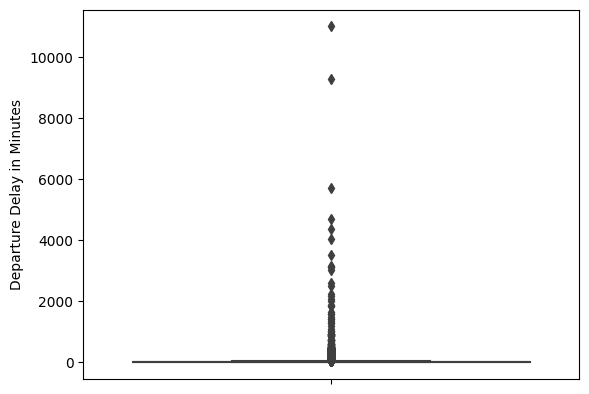

In [42]:
sns.boxplot(data=df, y='Departure Delay in Minutes')

In [43]:
df['Departure Delay in Minutes'].isnull().sum()

84

In [44]:
df.dropna(subset=['Departure Delay in Minutes'], inplace=True)

Оставим данные с информацией о задержке без дополнительной обработки. Будем считать, что выбросов нет и все данные отражены корректно. 

<Axes: ylabel='Departure Delay in Minutes'>

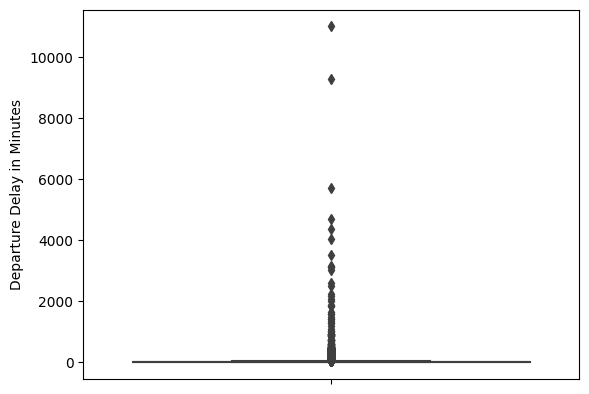

In [45]:
sns.boxplot(data=df, y='Departure Delay in Minutes')

<h4>Arrival Delay in Minutes</h4>

<Axes: ylabel='Arrival Delay in Minutes'>

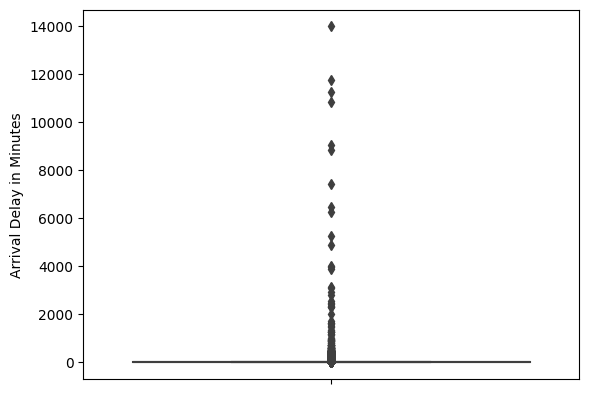

In [46]:
sns.boxplot(data=df, y='Arrival Delay in Minutes')

In [47]:
df['Arrival Delay in Minutes'].isnull().mean() * 100

0.3904329467565144

In [48]:
df.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

Признаки, которые будут представлены ниже являются числовыми. По смыслу они категориальные: клиент ставил оценку от 1-го до 5-ти включительно. Есть выбросы!

In [49]:
df['Inflight wifi service'].value_counts()

Inflight wifi service
3.0     25710
2.0     25671
4.0     19665
1.0     17731
5.0     11398
0.0      3092
6.0         6
21.0        4
7.0         3
40.0        2
16.0        2
12.0        2
18.0        1
20.0        1
28.0        1
25.0        1
45.0        1
10.0        1
15.0        1
Name: count, dtype: int64

Видим наличие множества выбросов. Заменим выбросы на подходящие значения в допустимом диапазоне. Заменим значения, равные 0, на наименьшее допустимое значение (1), а значения больше 5 на наибольшее допустимое значение (5).

In [50]:
df['Inflight wifi service'] = df['Inflight wifi service'].clip(lower=1, upper=5)

Пустые значения заменим на среднее.

In [51]:
df['Inflight wifi service'].isnull().sum()

33

In [52]:
df.dropna(subset='Inflight wifi service', inplace=True)

<h4>Departure/Arrival time convenient</h4>

In [53]:
df['Departure/Arrival time convenient'].value_counts()

Departure/Arrival time convenient
4.0     25391
5.0     22249
3.0     17841
2.0     17063
1.0     15395
0.0      5281
30.0        4
8.0         4
12.0        4
9.0         4
6.0         3
20.0        2
16.0        2
14.0        2
45.0        1
24.0        1
27.0        1
35.0        1
32.0        1
7.0         1
10.0        1
Name: count, dtype: int64

In [54]:
df['Departure/Arrival time convenient'] = df['Departure/Arrival time convenient'].clip(lower=1, upper=5)

In [55]:
df['Departure/Arrival time convenient'].value_counts()

Departure/Arrival time convenient
4.0    25391
5.0    22281
1.0    20676
3.0    17841
2.0    17063
Name: count, dtype: int64

In [56]:
df['Departure/Arrival time convenient'].isnull().sum()

41

In [57]:
df.dropna(subset='Departure/Arrival time convenient', inplace=True)

<h4>Ease of Online booking</h4>

In [58]:
df['Ease of Online booking'].value_counts()

Ease of Online booking
3.0     24291
2.0     23873
4.0     19416
1.0     17398
5.0     13758
0.0      4460
18.0        3
8.0         3
12.0        3
16.0        2
10.0        2
24.0        2
15.0        1
14.0        1
28.0        1
9.0         1
21.0        1
45.0        1
36.0        1
20.0        1
Name: count, dtype: int64

In [59]:
df['Ease of Online booking'] = df['Ease of Online booking'].clip(lower=1, upper=5)

In [60]:
df['Ease of Online booking'].isnull().sum()

33

In [61]:
df.dropna(subset='Ease of Online booking', inplace=True)

<h4>Gate location</h4>

In [62]:
df['Gate location'].value_counts()

Gate location
3.0     28365
4.0     24263
2.0     19317
1.0     17431
5.0     13781
8.0         6
6.0         4
12.0        3
32.0        3
9.0         3
15.0        3
28.0        2
27.0        2
0.0         1
10.0        1
14.0        1
21.0        1
30.0        1
36.0        1
Name: count, dtype: int64

In [63]:
df['Gate location'] = df['Gate location'].clip(lower=1, upper=5)

In [64]:
df['Gate location'].value_counts()

Gate location
3.0    28365
4.0    24263
2.0    19317
1.0    17432
5.0    13812
Name: count, dtype: int64

In [65]:
df['Gate location'].isnull().sum()

30

In [66]:
df.dropna(subset='Gate location', inplace=True)

<h4>Food and drink</h4>

In [67]:
df['Food and drink'].value_counts()

Food and drink
4.0     24183
3.0     22148
5.0     22142
2.0     21816
1.0     12737
0.0       110
8.0         3
9.0         3
16.0        2
35.0        1
12.0        1
7.0         1
36.0        1
45.0        1
24.0        1
27.0        1
18.0        1
32.0        1
10.0        1
6.0         1
Name: count, dtype: int64

In [68]:
df['Food and drink'] = df['Food and drink'].clip(lower=1, upper=5)

In [69]:
df['Food and drink'].isnull().sum()

34

In [70]:
df.dropna(subset='Food and drink', inplace=True)

<h4>Online boarding</h4>

In [71]:
df['Online boarding'].value_counts()

Online boarding
4.0     30494
3.0     21655
5.0     20540
2.0     17379
1.0     10608
0.0      2412
20.0        5
24.0        4
27.0        2
15.0        2
30.0        2
10.0        2
6.0         2
28.0        2
8.0         2
12.0        2
16.0        2
32.0        1
21.0        1
40.0        1
Name: count, dtype: int64

In [72]:
df['Online boarding'] = df['Online boarding'].clip(lower=1, upper=5)

In [73]:
df['Online boarding'].value_counts()

Online boarding
4.0    30494
3.0    21655
5.0    20570
2.0    17379
1.0    13020
Name: count, dtype: int64

In [74]:
df['Online boarding'].isnull().sum()

37

In [75]:
df.dropna(subset='Online boarding', inplace=True)

<h4>Seat comfort</h4> 

In [76]:
df['Seat comfort'].value_counts()

Seat comfort
4.0     31517
5.0     26248
3.0     18536
2.0     14774
1.0     11970
0.0         4
16.0        3
24.0        3
8.0         3
6.0         3
36.0        2
20.0        2
14.0        2
12.0        2
10.0        2
15.0        2
18.0        1
27.0        1
9.0         1
30.0        1
45.0        1
Name: count, dtype: int64

In [77]:
df['Seat comfort'] = df['Seat comfort'].clip(lower=1, upper=5)

In [78]:
df['Seat comfort'].value_counts()

Seat comfort
4.0    31517
5.0    26277
3.0    18536
2.0    14774
1.0    11974
Name: count, dtype: int64

In [79]:
df['Seat comfort'].isnull().sum()

40

In [80]:
df.dropna(subset='Seat comfort', inplace=True)

<h4>Inflight entertainment</h4>

In [81]:
df['Inflight entertainment'].value_counts()

Inflight entertainment
4.0     29162
5.0     25018
3.0     18973
2.0     17475
1.0     12368
0.0        18
20.0        3
16.0        2
8.0         2
6.0         2
12.0        2
40.0        2
18.0        1
9.0         1
7.0         1
36.0        1
25.0        1
35.0        1
32.0        1
Name: count, dtype: int64

In [82]:
df['Inflight entertainment'] = df['Inflight entertainment'].clip(lower=1, upper=5)

In [83]:
df['Inflight entertainment'].value_counts()

Inflight entertainment
4.0    29162
5.0    25038
3.0    18973
2.0    17475
1.0    12386
Name: count, dtype: int64

In [84]:
df['Inflight entertainment'].isnull().sum()

44

In [85]:
df.dropna(subset='Inflight entertainment', inplace=True)

<h4>On-board service</h4>

In [86]:
df['On-board service'].value_counts()

On-board service
4.0     30589
5.0     23433
3.0     22644
2.0     14540
1.0     11766
0.0         7
36.0        3
10.0        3
12.0        3
16.0        2
32.0        2
20.0        2
45.0        2
8.0         1
24.0        1
40.0        1
6.0         1
28.0        1
30.0        1
Name: count, dtype: int64

In [87]:
df['On-board service'] = df['On-board service'].clip(lower=1, upper=5)

In [88]:
df['On-board service'].value_counts()

On-board service
4.0    30589
5.0    23456
3.0    22644
2.0    14540
1.0    11773
Name: count, dtype: int64

In [89]:
df['On-board service'].isnull().sum()

32

In [90]:
df.dropna(subset='On-board service', inplace=True)

<h4>Leg room service</h4>

In [91]:
df['Leg room service'].value_counts()

Leg room service
4.0     28512
5.0     24430
3.0     19916
2.0     19355
1.0     10246
0.0       471
15.0        5
32.0        3
10.0        3
30.0        3
25.0        3
18.0        2
14.0        2
16.0        2
20.0        2
35.0        2
6.0         2
21.0        1
36.0        1
24.0        1
9.0         1
8.0         1
40.0        1
27.0        1
Name: count, dtype: int64

In [92]:
df['Leg room service'] = df['Leg room service'].clip(lower=1, upper=5)

In [93]:
df['Leg room service'].value_counts()

Leg room service
4.0    28512
5.0    24466
3.0    19916
2.0    19355
1.0    10717
Name: count, dtype: int64

In [94]:
df['Leg room service'].isnull().sum()

36

In [95]:
df.dropna(subset='Leg room service', inplace=True)

<h4>Baggage handling</h4>

In [96]:
df['Baggage handling'].value_counts()

Baggage handling
4.0     37036
5.0     26863
3.0     20428
2.0     11413
1.0      7170
0.0         4
32.0        2
20.0        2
40.0        2
16.0        2
27.0        2
28.0        2
9.0         1
14.0        1
8.0         1
36.0        1
25.0        1
10.0        1
18.0        1
30.0        1
15.0        1
Name: count, dtype: int64

In [97]:
df['Baggage handling'] = df['Baggage handling'].clip(lower=1, upper=5)

In [98]:
df['Baggage handling'].isnull().sum()

31

In [99]:
df.dropna(subset='Baggage handling', inplace=True)

<h4>Checkin service</h4>

In [100]:
df['Checkin service'].value_counts()

Checkin service
4.0     28761
3.0     28147
5.0     20419
2.0     12771
1.0     12767
8.0         5
0.0         5
6.0         4
28.0        3
15.0        3
7.0         2
45.0        2
20.0        2
9.0         2
10.0        1
12.0        1
24.0        1
21.0        1
16.0        1
36.0        1
14.0        1
35.0        1
Name: count, dtype: int64

In [101]:
df['Checkin service'] = df['Checkin service'].clip(lower=1, upper=5)

In [102]:
df['Checkin service'].value_counts()

Checkin service
4.0    28761
3.0    28147
5.0    20450
1.0    12772
2.0    12771
Name: count, dtype: int64

In [103]:
df['Checkin service'].isnull().sum()

34

In [104]:
df.dropna(subset='Checkin service', inplace=True)

<h4>Inflight service</h4>

In [105]:
df['Inflight service'].value_counts()

Inflight service
4.0     37558
5.0     26840
3.0     20084
2.0     11326
1.0      7008
12.0        5
0.0         4
16.0        3
8.0         3
28.0        3
15.0        3
9.0         2
14.0        2
35.0        2
25.0        2
10.0        2
36.0        1
30.0        1
6.0         1
24.0        1
21.0        1
20.0        1
Name: count, dtype: int64

In [106]:
df['Inflight service'] = df['Inflight service'].clip(lower=1, upper=5)

In [107]:
df['Inflight service'].isnull().sum()

48

In [108]:
df.dropna(subset='Inflight service', inplace=True)

<h4>Cleanliness</h4>

In [109]:
df['Cleanliness'].value_counts()

Cleanliness
4.0     26890
3.0     24333
5.0     22435
2.0     15951
1.0     13176
0.0        18
16.0        2
30.0        2
15.0        2
32.0        2
9.0         2
6.0         1
12.0        1
21.0        1
18.0        1
28.0        1
45.0        1
7.0         1
40.0        1
10.0        1
Name: count, dtype: int64

In [110]:
df['Cleanliness'] = df['Cleanliness'].clip(lower=1, upper=5)

In [111]:
df['Cleanliness'].isnull().sum()

31

In [ ]:
df.dropna(subset='Cleanliness', inplace=True)

Посмотрим на наш датасет после всех очисток.

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102822 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 102822 non-null  int64  
 1   Gender                             102822 non-null  object 
 2   Age                                102822 non-null  float64
 3   Customer Type                      102822 non-null  object 
 4   Type of Travel                     102822 non-null  object 
 5   Class                              102822 non-null  object 
 6   Flight Distance                    102822 non-null  float64
 7   Departure Delay in Minutes         102822 non-null  float64
 8   Arrival Delay in Minutes           102822 non-null  float64
 9   Inflight wifi service              102822 non-null  float64
 10  Departure/Arrival time convenient  102822 non-null  float64
 11  Ease of Online booking             102822 no

Разобьем наш датасет на признаки features и целевую переменную target.

In [118]:
X = df.drop(['satisfaction', 'id'], axis=1)
y = df['satisfaction']

In [119]:
X.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0
1,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,2.0,2.0,2.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0
2,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0
3,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,2.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0
4,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,3.0,3.0,3.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0


In [120]:
y

0         neutral or dissatisfied
1                       satisfied
2                       satisfied
3                       satisfied
4                       satisfied
                   ...           
129873    neutral or dissatisfied
129874    neutral or dissatisfied
129877    neutral or dissatisfied
129878                  satisfied
129879    neutral or dissatisfied
Name: satisfaction, Length: 102822, dtype: object

Разобьем данные на тренировочную и тестовую выборки

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=RANDOM_STATE)

X_train.shape, X_test.shape

((82257, 22), (20565, 22))

Продолжим предобработку признаков для создания и обучения модели (логистической регрессии:

* закодируем категориальные признаки
* масштабируем числовые признаки)

In [124]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler


categorical = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
numeric_features = [col for col in X_train.columns if col not in categorical]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

In [125]:
X_train_transformed

array([[1.  , 0.  , 1.  , ..., 0.75, 0.75, 0.25],
       [1.  , 0.  , 1.  , ..., 1.  , 0.75, 1.  ],
       [1.  , 1.  , 0.  , ..., 0.  , 1.  , 0.75],
       ...,
       [0.  , 0.  , 0.  , ..., 0.25, 0.25, 0.  ],
       [1.  , 0.  , 1.  , ..., 0.75, 0.75, 1.  ],
       [1.  , 0.  , 0.  , ..., 0.25, 0.75, 0.75]])

In [126]:
lst = list(column_transformer.transformers_[0][1].get_feature_names_out())
lst.extend(numeric_features)

X_train_transformed = pd.DataFrame(X_train_transformed, columns=lst)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=lst)

X_train_transformed.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1.0,0.0,1.0,1.0,0.0,0.368932,0.306767,0.001726,0.000000,0.00,1.00,0.00,0.50,0.25,0.0,0.25,0.25,0.75,0.50,0.75,0.75,0.75,0.25
1,1.0,0.0,1.0,1.0,0.0,0.524272,0.698315,0.000000,0.003070,0.25,0.75,0.25,0.25,0.25,1.0,1.00,0.25,0.50,0.50,0.00,1.00,0.75,1.00
2,1.0,1.0,0.0,1.0,0.0,0.194175,0.146028,0.000000,0.000000,0.00,0.00,0.00,0.75,0.75,0.0,0.75,0.75,1.00,1.00,0.25,0.00,1.00,0.75
3,0.0,0.0,0.0,0.0,0.0,0.417476,0.810645,0.000091,0.001142,0.00,0.00,0.00,0.00,0.25,1.0,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.50
4,0.0,0.0,0.0,0.0,0.0,0.223301,0.354805,0.000000,0.000000,0.50,0.50,0.50,0.50,1.00,1.0,1.00,1.00,0.50,0.50,0.75,1.00,0.75,1.00


Создадим и обучим модель (логистическую регрессию) для классификации

In [150]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_transformed, y_train)

model.predict(X_test_transformed)

array(['satisfied', 'satisfied', 'neutral or dissatisfied', ...,
       'neutral or dissatisfied', 'neutral or dissatisfied',
       'neutral or dissatisfied'], dtype=object)

Для нашей задачи обучения наиболее важной задачей может быть предсказание недовольных клиентов. Это связано с тем, что недовольные клиенты могут иметь отрицательное влияние на бизнес компании. Они могут оставлять негативные отзывы, снижать рейтинг компании, уходить к конкурентам и т.д. Поэтому, предсказание неудовлетворенных клиентов с высокой точностью позволяет компании принять меры для улучшения их опыта и предотвращения потенциальных негативных последствий.

Посмотрим на матрицу ошибок (confusion matrix) для оценивания результата модели. 

In [151]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[10552,  1113],
       [ 1328,  7572]], dtype=int64)

На основе матрицы ошибок можно сделать следующие выводы:

- True Positive (TP): 7572 - количество правильно классифицированных положительных примеров (клиентов, которые действительно удовлетворены полетом).
- False Positive (FP): 1113 - количество неправильно классифицированных положительных примеров (клиентов, которые были неправильно предсказаны как удовлетворенные).
- False Negative (FN): 1328 - количество неправильно классифицированных отрицательных примеров (клиентов, которые были неправильно предсказаны как недовольные).
- True Negative (TN): 10552 - количество правильно классифицированных отрицательных примеров (клиентов, которые действительно недовольны полетом).

Посмотрим также на другие метрики для оценки модели

<h4>Accuracy</h4>

Доля правильно классифицированных примеров от общего числа примеров. Эта метрика показывает, насколько точно модель предсказывает удовлетворение или неудовлетворение клиента

In [152]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.8813031850230975

Доля правильно предсказанных неудовлетворенных клиентов среди всех предсказанных неудовлетворенных клиентов. 

In [153]:
from sklearn.metrics import precision_score

precision_score(y_test, pred, pos_label='neutral or dissatisfied')

0.8882154882154882

Доля правильно предсказанных неудовлетворенных клиентов среди всех действительно неудовлетворенных клиентов. 

In [154]:
from sklearn.metrics import recall_score

recall_score(y_test, pred, pos_label='neutral or dissatisfied')

0.9045863694813545

<h3>Оценка важности признаков</h3>


Применим метод масштабирования к столбцам с данными о возрасте, дальности полета и продолжительности задержек.

In [ ]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


# # Определение столбцов, требующих масштабирования
# columns_to_scale = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# # Создание объекта StandardScaler
# scaler = StandardScaler()

# # Создание ColumnTransformer с применением масштабирования только к указанным столбцам
# preprocessor = ColumnTransformer(
#     transformers=[('num', scaler, columns_to_scale)])

# # Масштабирование указанных столбцов на всем наборе данных
# X_scaled = preprocessor.fit_transform(X)

# Разделение выборки на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Создание экземпляра модели Random Forest
model = RandomForestClassifier()

# Определение сетки гиперпараметров для перебора
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Поиск наилучших гиперпараметров с использованием Grid Search и кросс-валидации
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Получение лучшей модели
best_model = grid_search.best_estimator_

# Обучение лучшей модели на всем тренировочном наборе данных
best_model.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred = best_model.predict(X_test)

# Оценка точности модели
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Вывод отчета по классификации
print(classification_report(y_test, y_pred))


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)